# Implementation of  batch,  stochastic and mini batch gradient descent in python
**We will use very simple home prices data set to implement batch gradient descent in python.**

Batch GD: Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties.

Stochastic GD: we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights.

Mini batch GD: we use a batch of m samples where 0 < m < n. (where n is total number of training samples)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**Load the dataset in pandas dataframe**

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df.shape[0]

20

**Preprocessing/Scaling: Since our columns are on different sacle to perform scaling on them**

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [11]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [5]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

 **Convert target column (i.e. price) from 2D to 1D**

In [41]:
scaled_y.reshape(df.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

 **Gradient descent allows you to find weights (w1,w2) and bias in following linear equation for housing price prediction:**

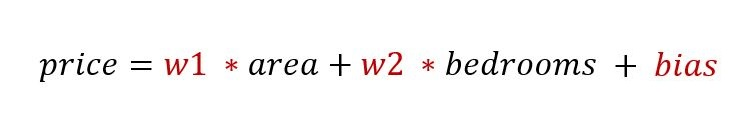
# Batch Gradient Discent Implementation:


In [16]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b
        

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    #print(y_true)
    #print(w_grad)
    #print(b_grad)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

**Now plot epoch vs cost graph to see how cost reduces as number of epoch increases**

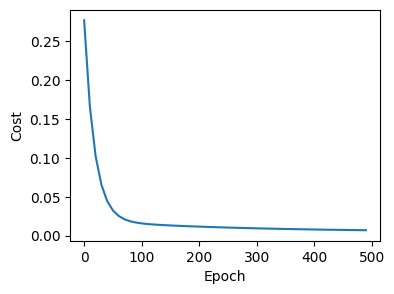

In [17]:
plt.figure(figsize=(4,3))
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)

In [21]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

D:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [22]:
predict(1100,2,w,b)

D:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


33.544881592579756

In [23]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

1

# Stochastic Gradient Discent Implementation:

In [24]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
            
    #print(y_predicted)
    #print(w_grad)
    #print(cost)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)


In [25]:
w_sgd, b_sgd, cost_sgd

(array([0.70734177, 0.67541448]), -0.23005121787561136, 0.006712112653814006)

 **Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,**

In [26]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

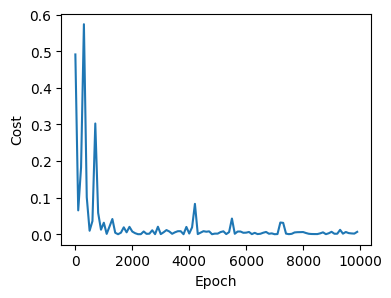

In [27]:
plt.figure(figsize=(4,3))
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [28]:
predict(1056,2,w_sgd, b_sgd) 

D:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


32.16788700262132

In [29]:
predict(3880,5,w_sgd, b_sgd) 

D:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


193.54221610131003

# Mini Batch Gradient Descent Implementation:

In [35]:
np.random.permutation(20)

array([ 5,  1,  3, 15, 10, 16, 19,  2,  7,  9, 12, 18,  0, 11, 17,  8, 14,
        4,  6, 13])

In [40]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    #if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        #batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    #num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    #print(Xj)
    #print(yj)    
    return w, b, cost, cost_list, epoch_list


w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],), epochs = 120, batch_size = 5
)
print(w), b, cost_list

[[0.12931034 0.25      ]
 [0.68448276 0.75      ]
 [0.17586207 0.5       ]
 [0.13103448 0.5       ]
 [0.06896552 0.25      ]]
[0.70997212 0.67802359]


(None,
 -0.23342980293224347,
 [0.17589236216241427,
  0.04435988981882986,
  0.008895578845658645,
  0.036655846102539226,
  0.02295660211050477,
  0.009138822419933794,
  0.0040449924158387895,
  0.006521110833724112,
  0.016230443161451537,
  0.013722503827171365,
  0.0027145335309935134,
  0.0031586428199998394])

 **Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,** w1= 0.7101325, w2= 0.6782007 , b= -0.23333236

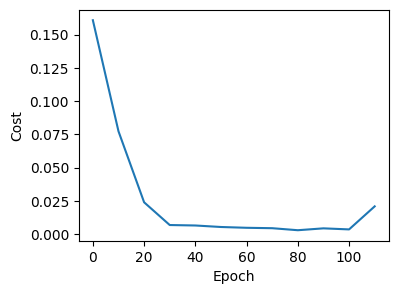

In [36]:
plt.figure(figsize=(4,3))
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list,cost_list)